In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_df = pd.get_dummies(titanic_df[['Survived','Sex','Age','Pclass']])
titanic_df

,Survived,Age,Pclass,Sex_female,Sex_male
0,0,22.0,3,False,True
1,1,38.0,1,True,False
2,1,26.0,3,True,False
3,1,35.0,1,True,False
4,0,35.0,3,False,True
...,...,...,...,...,...
886,0,27.0,2,False,True
887,1,19.0,1,True,False
888,0,NaN,3,True,False
889,1,26.0,1,False,True


<Axes: >

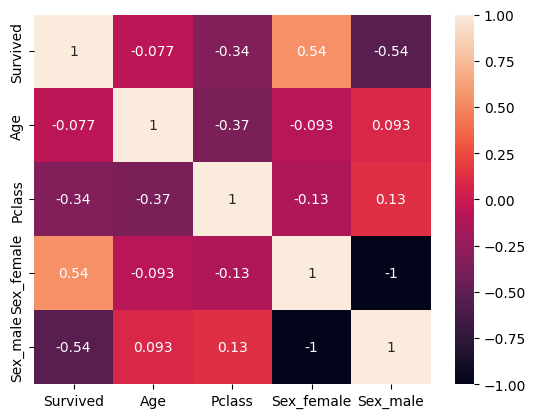

In [22]:
correlation = titanic_df.corr()
sns.heatmap(correlation, annot = True)

In [29]:
y = titanic_df['Survived']
X = titanic_df[['Sex_female','Sex_male','Pclass']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)    

In [30]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [31]:
y_pred = regression.predict(X_test)
y_pred


array([0.0859375 , 0.23046875, 0.0859375 , 0.7890625 , 0.64453125,
       0.93359375, 0.64453125, 0.0859375 , 0.64453125, 0.93359375,
       0.375     , 0.0859375 , 0.64453125, 0.0859375 , 0.23046875,
       0.93359375, 0.375     , 0.64453125, 0.23046875, 0.375     ,
       0.0859375 , 0.375     , 0.64453125, 0.0859375 , 0.0859375 ,
       0.0859375 , 0.375     , 0.23046875, 0.0859375 , 0.64453125,
       0.0859375 , 0.64453125, 0.375     , 0.64453125, 0.0859375 ,
       0.0859375 , 0.375     , 0.64453125, 0.93359375, 0.0859375 ,
       0.23046875, 0.0859375 , 0.0859375 , 0.0859375 , 0.64453125,
       0.0859375 , 0.0859375 , 0.0859375 , 0.0859375 , 0.375     ,
       0.64453125, 0.93359375, 0.0859375 , 0.375     , 0.0859375 ,
       0.93359375, 0.23046875, 0.93359375, 0.7890625 , 0.64453125,
       0.0859375 , 0.7890625 , 0.7890625 , 0.375     , 0.0859375 ,
       0.7890625 , 0.23046875, 0.0859375 , 0.0859375 , 0.93359375,
       0.7890625 , 0.93359375, 0.375     , 0.93359375, 0.08593

In [32]:
accuracy_score = regression.score(X_test, y_test)
accuracy_score

0.4148819163230457

I choose to use linear regression because we are mostly dealing with continuous numerical values. further more the variables I chose to use were gender and passenger class to predict if people will survive becuase they had correlation with survivability.